In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('NN_performance.csv')
display(df.head())

,x1,x2,x3,y
0,0,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,2
4,0,1,0,2


In [10]:
X = df[['x1', 'x2', 'x3']].values
Y = df[['y']].values

print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

# print(X)
# print(Y)

Shape of X: (500, 3)
Shape of Y: (500, 1)
[[0 1 1]
 [1 1 1]
 [1 1 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 0]]


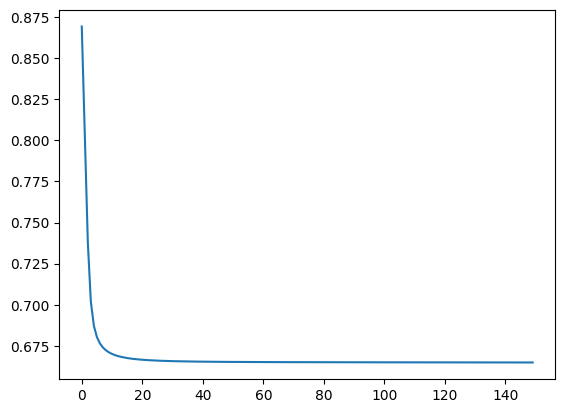

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data (example)
np.random.seed(0)


class NeuralNetwork3Layer(object):
    def __init__(self):

        self.input_neurons = 3
        self.hidden1_neurons = 8
        self.hidden2_neurons = 6
        self.output_neurons = 3


        self.lr = 0.01


        self.W_H1 = np.random.randn(self.input_neurons, self.hidden1_neurons)
        self.W_H2 = np.random.randn(self.hidden1_neurons, self.hidden2_neurons)
        self.W_O = np.random.randn(self.hidden2_neurons, self.output_neurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):

        self.z1 = np.dot(X, self.W_H1)
        self.a1 = self.sigmoid(self.z1)


        self.z2 = np.dot(self.a1, self.W_H2)
        self.a2 = self.sigmoid(self.z2)


        self.z3 = np.dot(self.a2, self.W_O)
        self.output = self.sigmoid(self.z3)

        return self.output

    def backPropagation(self, X, Y, pred):

        error_output = Y - pred
        delta_output = self.lr * error_output * self.sigmoid(pred, der=True)


        error_hidden2 = np.dot(delta_output, self.W_O.T)
        delta_hidden2 = self.lr * error_hidden2 * self.sigmoid(self.a2, der=True)


        error_hidden1 = np.dot(delta_hidden2, self.W_H2.T)
        delta_hidden1 = self.lr * error_hidden1 * self.sigmoid(self.a1, der=True)


        self.W_O += np.dot(self.a2.T, delta_output)
        self.W_H2 += np.dot(self.a1.T, delta_hidden2)
        self.W_H1 += np.dot(X.T, delta_hidden1)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)

NN = NeuralNetwork3Layer()
err = []

for i in range(150):
    NN.train(X, Y)
    pred = NN.feedForward(X)
    loss = np.mean(np.square(Y - pred))
    err.append(loss)

# plot error
plt.plot(err)
plt.show()
